In [34]:
import carpuzzle.solver as m
from importlib import reload

In [35]:
reload(m)

<module 'carpuzzle.solver' from '/Users/santiagoarmstrong/Documents/GitHub/carpuzzle/carpuzzle/solver.py'>

In [37]:
# initialize the solver using the optimal strategy
strategy = [(1,1), (0,1), (1,0), (1,2), (2,1), (0,0), (0,2) , (2,0), (2,2)]
solver = m.Recursive(strategy,path = "data/data.tsv", shape=(3,3))

In [38]:
# run
solver.backtracking()

True

In [39]:
print(solver.board)
solver.board.print_ids()
solver.board.is_compatible_board()

  YB    RB    GB  
BF  GFGB  BFBB  RB
  RF    YF    YB  
  RB    YB    YF  
BF  GBGF  BBBF  GF
  YF    RF    RB  
  YB    RB    RF  
RB  BFBB  GFGB  YF
  YF    BF    GF  

7,6,8
1,4,5
0,3,2



True

In [40]:
pi = [solver.board.array[i,j].id for i in range(3) for j in range (3)]
orientations = [solver.board.array[i,j].orientation for i in range(3) for j in range (3)]

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from scipy import ndimage


In [42]:
def img_reshape(i):
    img = Image.open('data/individual/'+str(i)+".png").convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img
    
img_arr = [img_reshape(i) for i in range(9)]

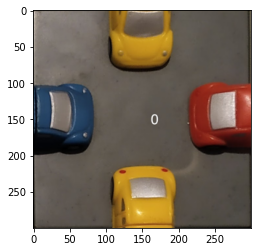

In [43]:
plt.imshow(np.asarray( img_arr[0]))

position  0 0 image 7 orientation 180
position  0 1 image 6 orientation 180
position  0 2 image 8 orientation 180
position  1 0 image 1 orientation 180
position  1 1 image 4 orientation 180
position  1 2 image 5 orientation 0
position  2 0 image 0 orientation 180
position  2 1 image 3 orientation 180
position  2 2 image 2 orientation 0


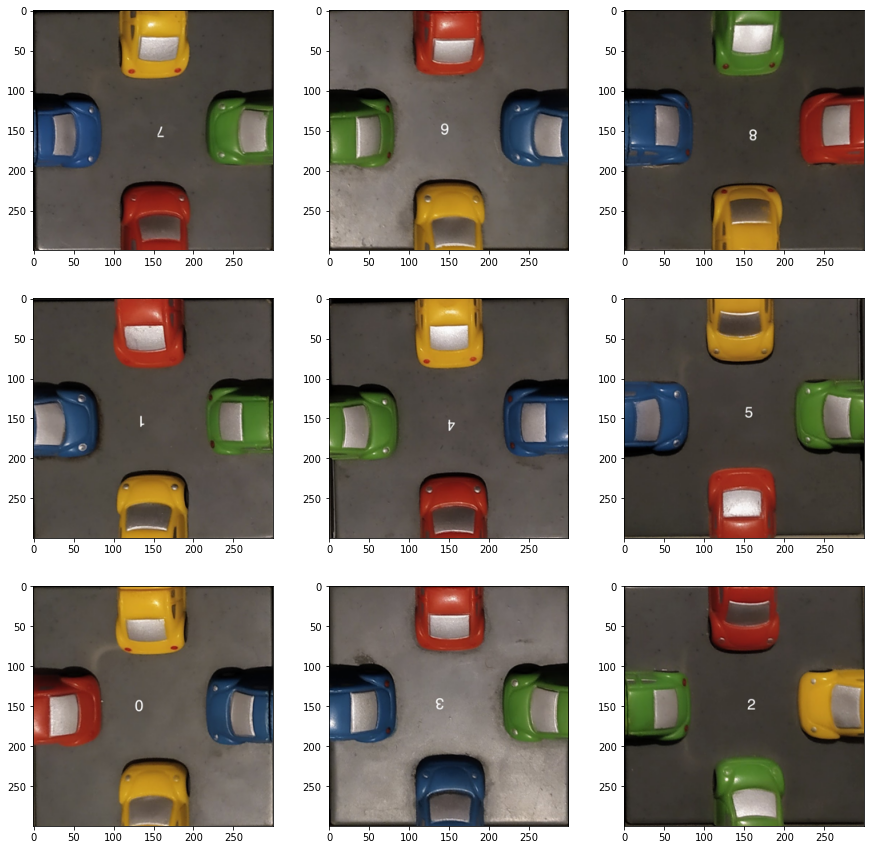

In [45]:
rows = 3
cols = 3
img_count = 0


fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))

for i in range(rows):
    for j in range(cols):
        
        # obtain the angle and the image
        degree =  - 90 + 90 * orientations[img_count]#TODO: img base orientation
        im_id = pi[img_count]

        rotated_img = ndimage.rotate(img_arr[im_id], degree)      
        axes[i, j].imshow(rotated_img)
        
        print("position ", i, j, "image", im_id, "orientation", degree)
        img_count+=1